## Entanglement

In this chapter we finally explain the special (and weird) properties of qubits, like superpositions and entanglement, that promise the computational speedup of quantum computers. We will determine how superposition and entanglement are linked to the probability outcomes of our measurements. Finally, we will implement and evaluate the circuits required to establish the so-called Bell states.

### Superposition
Quantum states $|\psi\rangle$ in general are linear combinations of the basis states $|0\rangle$ and $|1\rangle$. This combination is reffered to as superposition. In contrast to classical bits, qubits can be anywhere on the continuum between $|0\rangle$ and $|1\rangle$ prior to measurement:

$$|\psi\rangle= \alpha |0\rangle + \beta |1\rangle$$

The values $|\alpha|^2$ an $|\beta|^2$ represent the *probabilities* by which a quantum state will be in a state $|0\rangle$ or $|1\rangle$ after measurement. We have already seen probability amplitudes when working with the Hadamard gate:

$$H|0\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$$

where each state has a probability of $|\frac{1}{\sqrt{2}}|^2$ or $p= \frac{1}{2}$ of being measured.

#### _1. What are the measurement probabilities of the following states?_

a. $|\psi\rangle = \frac{1}{\sqrt{3}} |0\rangle + \sqrt{\frac{2}{3}} |1\rangle$

b. $|\psi\rangle = i\frac{2}{3} |0\rangle + \frac{\sqrt{5}}{3} |1\rangle$

#### Probabilities of a single measurement

$$|\psi\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{2}|01\rangle + \frac{1}{2}|10\rangle$$

### Bell States
If a state of a system that consists of 2 or more particles can be described as a product state it is called *seperable*. For example:

$$|\psi\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle) = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \otimes |0\rangle = |+\rangle \otimes |0\rangle$$

However, quantum states that are not seperable are referred to as *entangled*. The partial systems can not be described individually but only as a shared state. There are four states of two qubits, that are *maximally entangled*, this means learning something about one subsystem (or qubit) immediatly tells you the state of the other subsystem. They are known as *Bell states* or *EPR pairs*:

$$|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$$

$$|\Phi^-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle)$$

$$|\Psi^+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)$$

$$|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)$$

Maximally entangled states with three or more qubits are called *GHZ states*. However these systems are highly sensitive, as losing or measuring a single qubit destroys all the entanglements.

#### _2. Which of the following states is entangled?_

a. $\frac{1}{\sqrt{2}} (|10\rangle + |11\rangle)$

b. $\frac{1}{2}(|00\rangle + |01\rangle + |10\rangle +|11\rangle)$

c. $\sqrt{\frac{3}{4}} |00\rangle + \sqrt{\frac{1}{4}} |11\rangle$

d. $ \frac{|00\rangle - |10\rangle}{\sqrt{2}}$

### Entanglement Circuit

Entanglement can be implemented in Quantum Computing by combining the Hadarmad and the CNOT gate. Depending on the input qubits, one of the four Bell states can be established.

In [1]:
# import statements
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

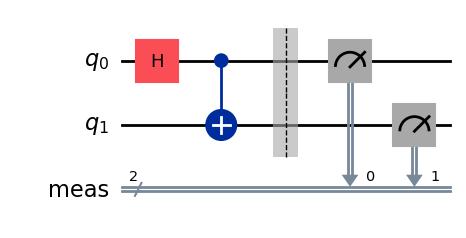

In [2]:
bell_state = QuantumCircuit(2)

bell_state.h(0)
bell_state.cx(0,1)
bell_state.measure_all()
bell_state.draw(output='mpl')

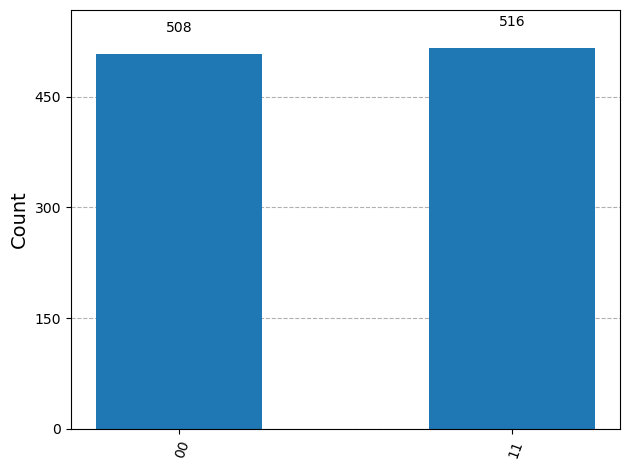

In [3]:
simulator = AerSimulator()
plot_histogram(simulator.run(bell_state).result().get_counts())

#### _3. Implement the other 3 Bell states $|\Phi⁻\rangle$, $|\Psi⁺\rangle$ and $|\Psi⁻\rangle$._

#### Superdense Coding

Superdense coding is a quantum communication protocol that lets you send two classical bits of information by transmitting only one qubit, provided you and the receiver already share an entangled Bell pair.

1. Shared entanglement: Alice and Bob start with a shared Bell state.

2. Encoding: Alice applies one of four operations to her qubit, each corresponding to a unique 2-bit message (00, 01, 10, 11).

3. Transmission: Alice sends her qubit to Bob.

4. Decoding: Bob now has both qubits, performs a Bell measurement, and determines which operation Alice applied — recovering the 2 bits.

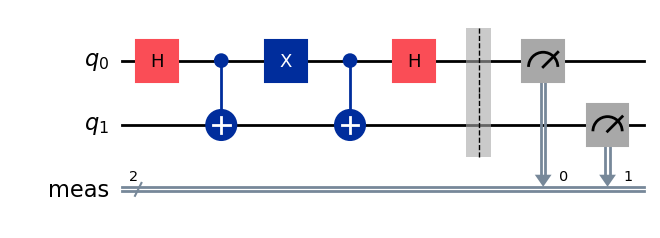

In [4]:
sdc = QuantumCircuit(2)

sdc.h(0)
sdc.cx(0,1)
sdc.x(0)
sdc.cx(0,1)
sdc.h(0)

sdc.measure_all()
sdc.draw(output='mpl')

#### _4a. What message did Alice encode? (What are the measurement results?)_

#### _4b. How does Alice need to change the circuit (replace the X-gate) if she wants to send $10$ instead? Implement the circuit in qiskit._